In [ ]:
%load_ext autoreload
%autoreload 2

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
#import keras as k
from keras.preprocessing import image

In [2]:
sys.path.insert(0, '..')
from image_eda import *

In [21]:
#import csv files, functions, variables, etc
df = pd.read_csv('../data/sample.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [22]:
image_path='../images'

In [23]:
df.head()

label                                     filepath
0  Impressionism  ..\images\Impressionism\Claude_Monet_47.jpg
1  Impressionism  ..\images\Impressionism\Claude_Monet_69.jpg
2  Impressionism   ..\images\Impressionism\Claude_Monet_8.jpg
3  Impressionism  ..\images\Impressionism\Claude_Monet_27.jpg
4  Impressionism  ..\images\Impressionism\Claude_Monet_15.jpg

Most images are heavily weighted towards Impressionism and Post-Impressionism. Abstract expressionism has the least amount of images.

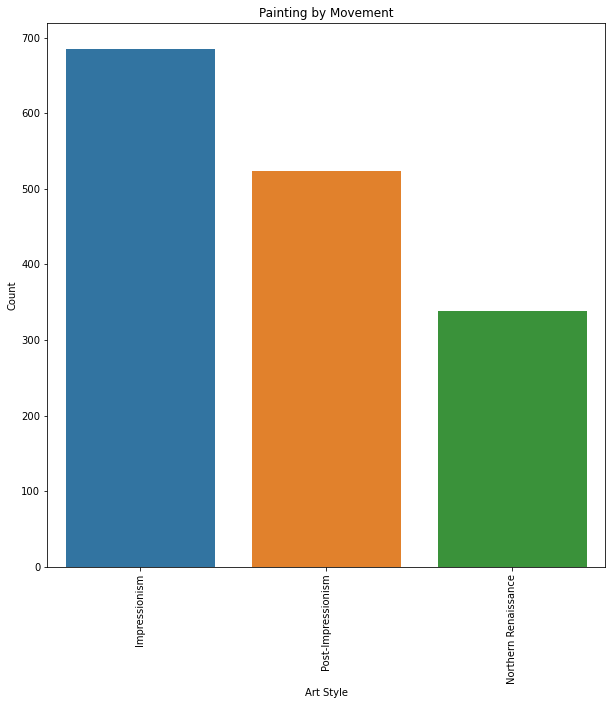

In [24]:
plt.figure(figsize=(10,10))
sns.barplot(x=df.label.value_counts().keys(), y=df.label.value_counts())
plt.xticks(rotation='vertical')
plt.xlabel('Art Style')
plt.ylabel('Count')
plt.title('Painting by Movement')

plt.show()

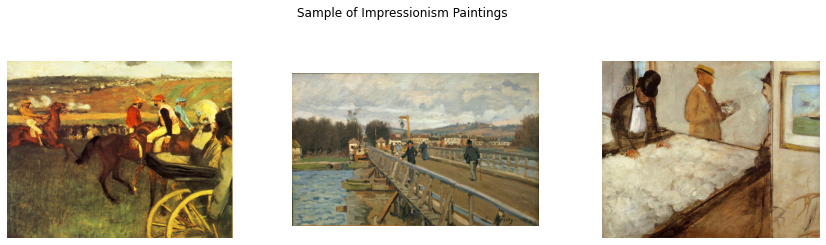

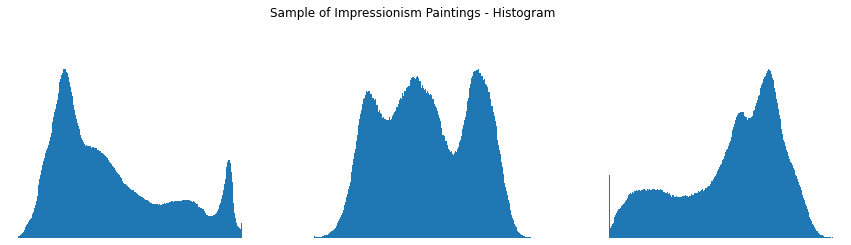

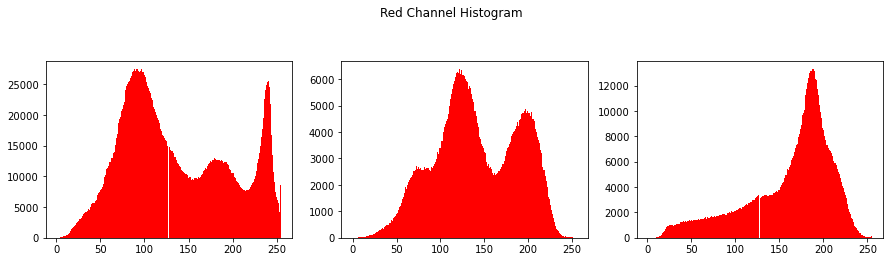

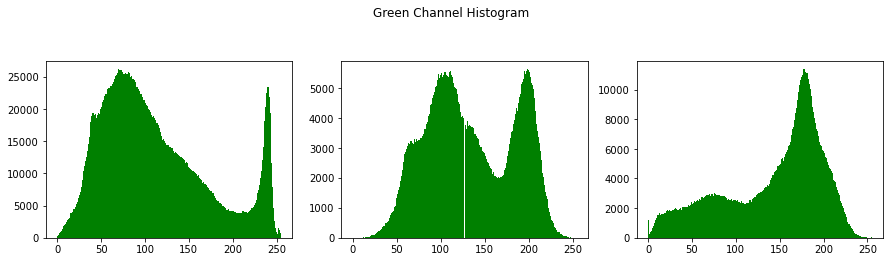

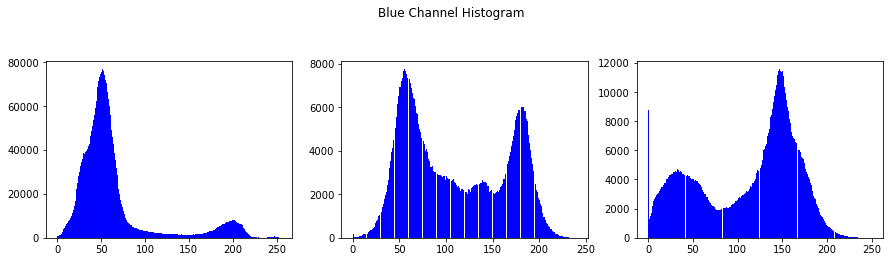

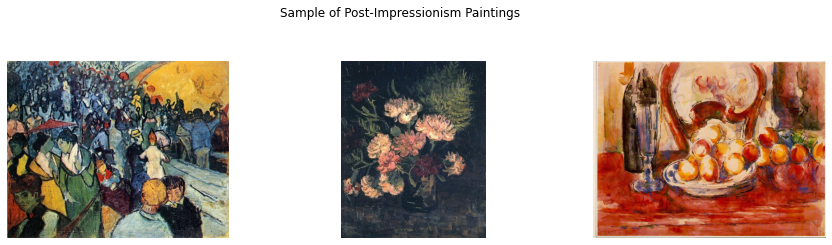

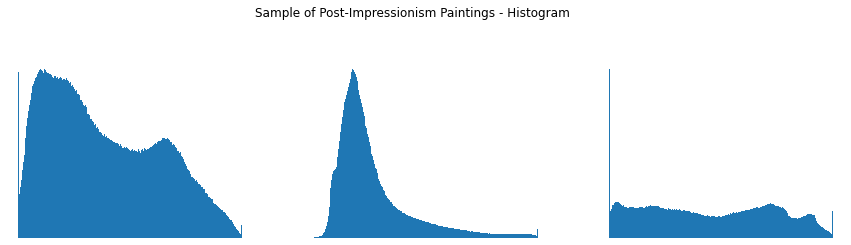

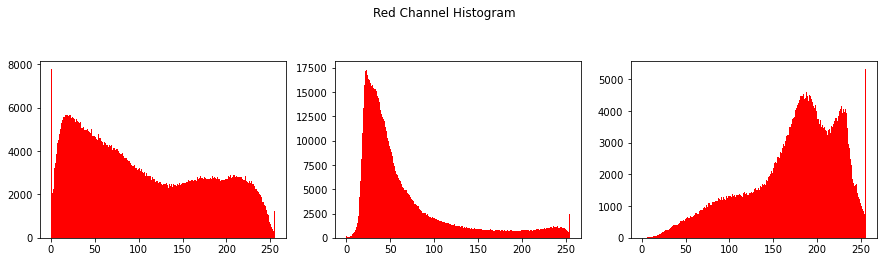

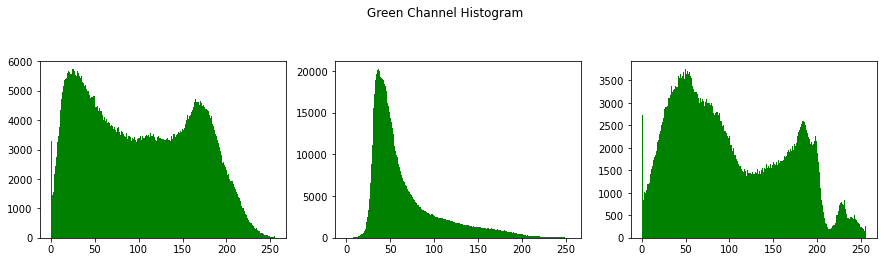

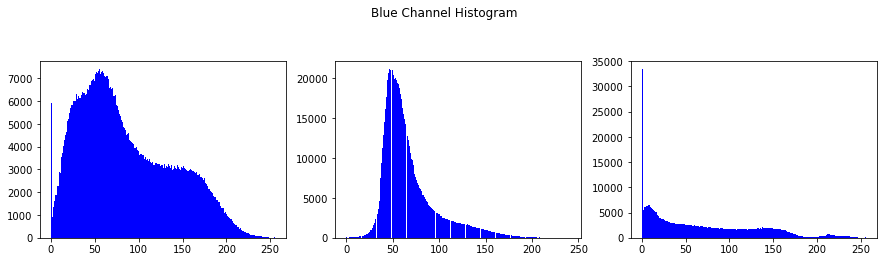

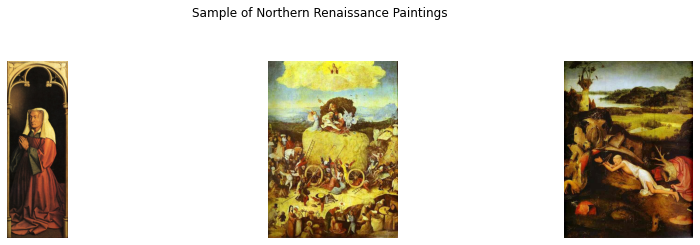

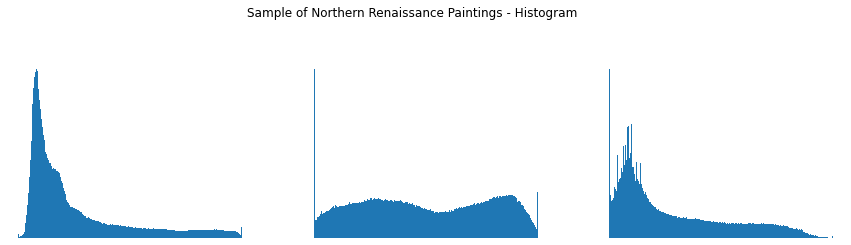

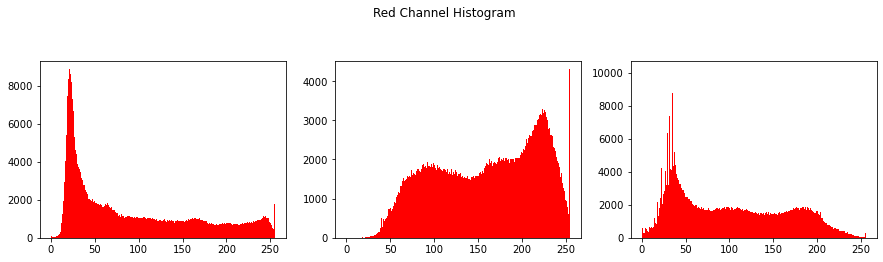

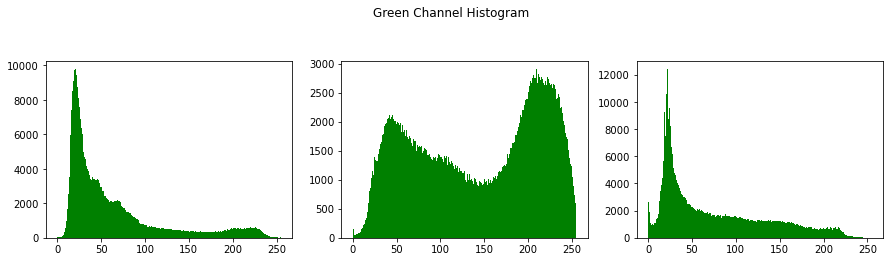

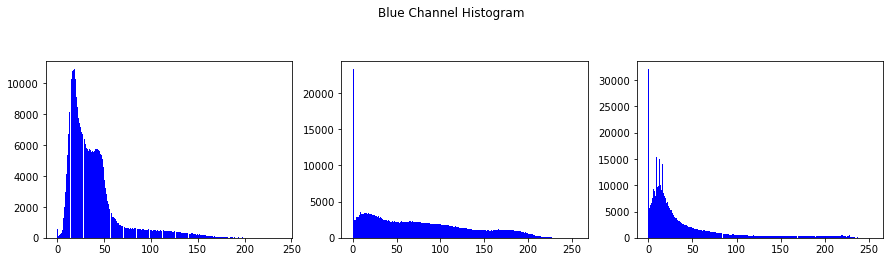

In [96]:
def display_color_histogram(filepath, label):
   
    filepath = list(np.random.choice(filepath, 3, replace=False))

    plt.figure(figsize=(15,15))

    for i in range(len(filepath)):
        ax = plt.subplot(4, 3, i + 1)
        image = plt.imread(filepath[i])
        plt.imshow(image)
        plt.axis('off')
    plt.suptitle(f'Sample of {label} Paintings', y=0.93)
    
    plt.figure(figsize=(15,15))

    for i in range(len(filepath)):
        ax = plt.subplot(4, 3, i + 1)
        image = plt.imread(filepath[i])
        plt.hist(image.ravel(), bins=256)
        plt.axis('off')
    plt.suptitle(f'Sample of {label} Paintings - Histogram', y=0.93)

    plt.figure(figsize=(15,15))

    for i in range(len(filepath)):
        ax = plt.subplot(4, 3, i + 1)
        image = plt.imread(filepath[i])
        red = image[:,:,0]
        plt.hist(red.ravel(), bins=256, color='red')
    plt.suptitle('Red Channel Histogram', y=0.93)

    plt.figure(figsize=(15,15))

    for i in range(len(filepath)):
        ax = plt.subplot(4, 3, i + 1)
        image = plt.imread(filepath[i])
        green = image[:,:,1]
        plt.hist(green.ravel(), bins=256, color='green')
    plt.suptitle('Green Channel Histogram', y=0.93)
    
    plt.figure(figsize=(15,15))

    for i in range(len(filepath)):
        ax = plt.subplot(4, 3, i + 1)
        image = plt.imread(filepath[i])
        blue = image[:,:,2]
        plt.hist(blue.ravel(), bins=256, color='blue')
    plt.suptitle('Blue Channel Histogram', y=0.93)
        
display_color_histogram(df.filepath.loc[df.label=='Impressionism'], 'Impressionism')
display_color_histogram(df.filepath.loc[df.label=='Post-Impressionism'], 'Post-Impressionism')
display_color_histogram(df.filepath.loc[df.label=='Northern Renaissance'], 'Northern Renaissance')

In [85]:
#turn images into a matrix
def img2np(path, size = (64, 64)):
     # iterating through each file
    for fn in os.listdir(path):
        fp = os.path.join(path, fn)
        current_image = image.load_img(fp, target_size = size, 
                                       color_mode = 'rgb')
        # covert image to a matrix
        img_ts = image.img_to_array(current_image)
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = img_ts
    return full_mat

In [86]:
dict_images = {}
for i in df.label.unique():
    newpath = os.path.join(image_path, i)
    dict_images[str(i)] = img2np(newpath)

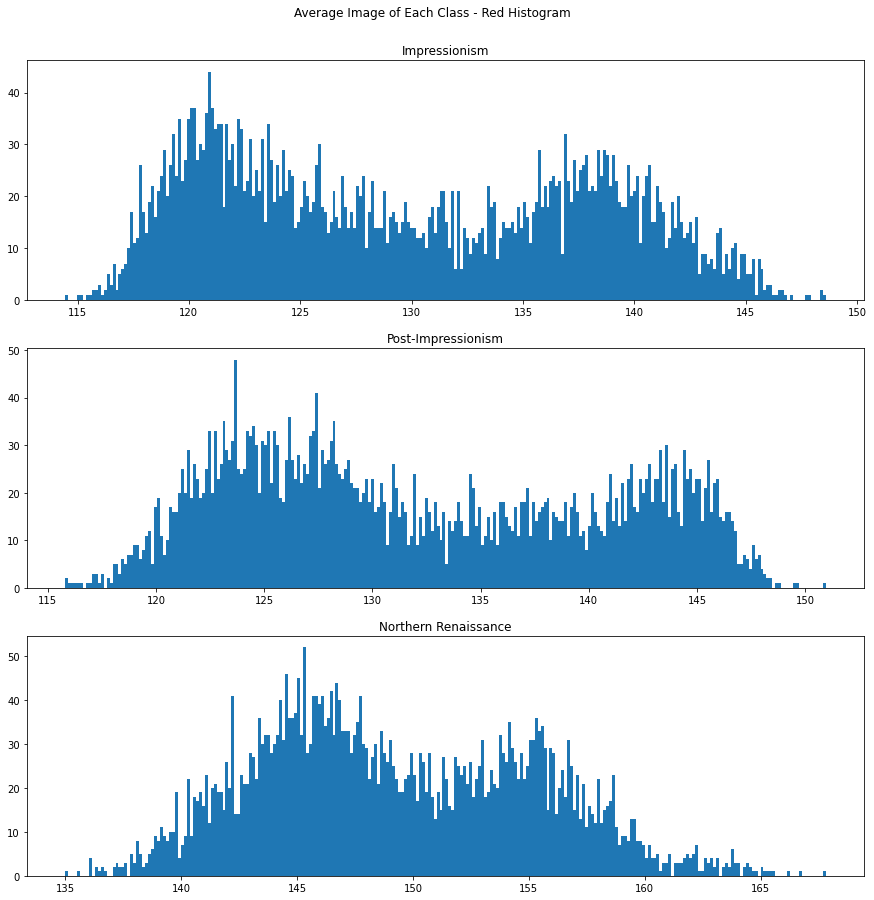

In [91]:
#average image
def find_mean_img(full_mat, title, size = (64, 64, 3)):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    return mean_img

mean_img = {}
for i in df.label.unique():
    mean_img[str(i)] = find_mean_img(dict_images[i], i)

#fig, axes = plt.subplots(nrows=8, ncols=4)
plt.figure(figsize=(15,15))

for i in range(len(mean_img)):
    ax = plt.subplot(3, 1,i + 1)
    #plt.imshow(mean_img[df.label.unique()[i]], vmin=0, vmax=255)
    image = mean_img[df.label.unique()[i]]
    red=image[:,:,0]
    plt.hist(red.ravel(), bins=256)
    plt.title(df.label.unique()[i])
    #plt.axis('off')

plt.suptitle('Average Image of Each Class - Red Histogram', y=0.93)
plt.show()

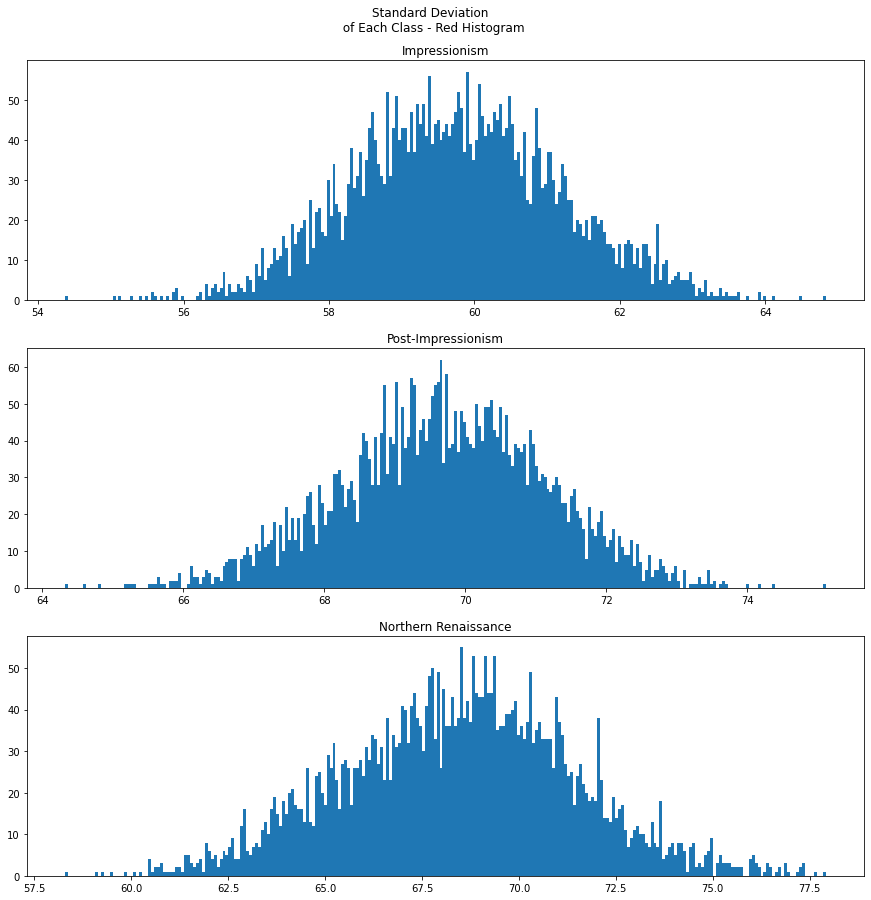

In [95]:
def find_std_img(full_mat, title, size = (64, 64, 3)):
    # calculate the average
    std_img = np.std(full_mat, axis = 0)
    # reshape it back to a matrix
    std_img = std_img.reshape(size)
    
    return std_img

std_img = {}
for i in df.label.unique():
    std_img[str(i)] = find_std_img(dict_images[i], i)

plt.figure(figsize=(15,15))

for i in range(len(std_img)):
    ax = plt.subplot(3, 1, i + 1)
    #plt.imshow(std_img[df.label.unique()[i]], vmin=0, vmax=255)
    image=std_img[df.label.unique()[i]]
    red=image[:,:,0]
    plt.hist(red.ravel(), bins=256)
    plt.title(df.label.unique()[i])
    #plt.axis('off')
plt.suptitle('Standard Deviation \n of Each Class - Red Histogram', y=0.93)
plt.show()

Number of PC for Impressionism:  43


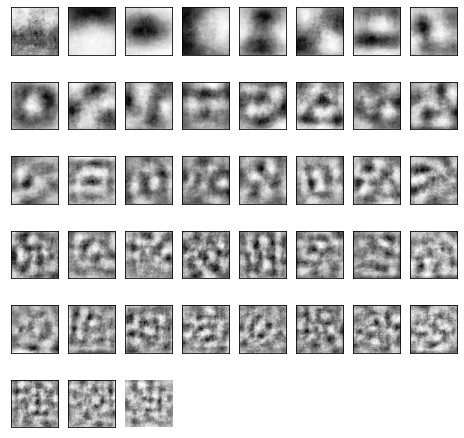

Number of PC for Post-Impressionism:  47


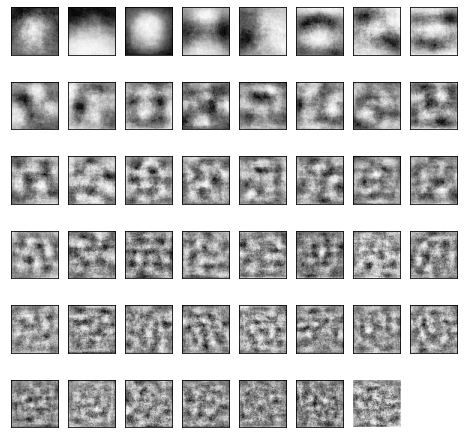

Number of PC for Northern Renaissance:  23


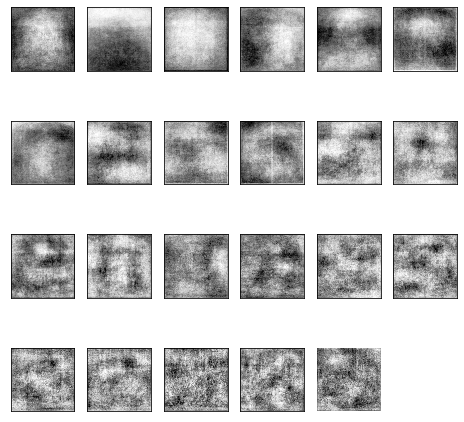

In [29]:
from sklearn.decomposition import PCA
from math import ceil

def eigenimages(full_mat, title, n_comp = 0.7, size = (64, 64)):
    # fit PCA to describe n_comp * variability in the class
    pca = PCA(n_components = n_comp, whiten = True)
    pca.fit(full_mat)
    print(f'Number of PC for {title}: ', pca.n_components_)
    return pca
  
def plot_pca(pca, size = (64, 64)):
    # plot eigenimages in a grid
    n = pca.n_components_
    fig = plt.figure(figsize=(8, 8))
    r = int(n**.5)
    c = ceil(n/ r)
    for i in range(n):
        ax = fig.add_subplot(r, c, i + 1, xticks = [], yticks = [])
        ax.imshow(pca.components_[i].reshape(size), 
                  cmap='Greys_r')
    plt.axis('off')
    plt.show()

for i in df.label.unique():
    plot_pca(eigenimages(dict_images[i], i))


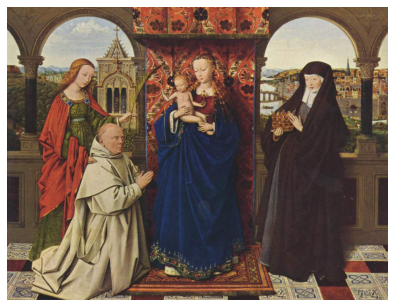

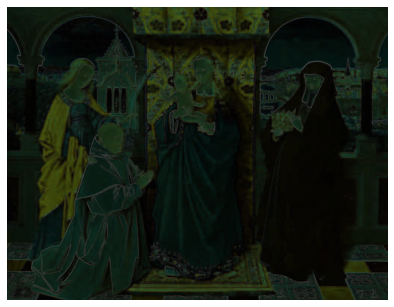

In [142]:
from skimage.filters import sobel

filename = list(np.random.choice(df.filepath.loc[df.label=='Northern Renaissance'], 1, replace=False))

image = plt.imread(filename[0])
edge_sobel = sobel(image)

plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')

plt.figure(figsize=(15,15))
plt.subplot(1, 2, 2)
plt.imshow(edge_sobel)
plt.axis('off')

plt.show()

#plot_comparison(image, edge_sobel, "Edge with Sobel")

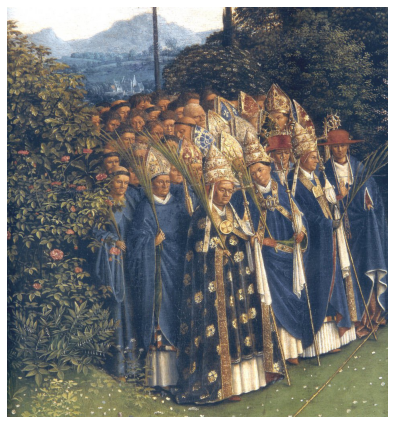

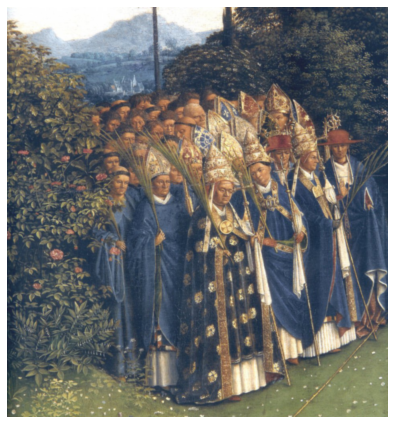

In [138]:
from skimage.filters import gaussian

gaussian_image = gaussian(image, multichannel=True)

plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')

plt.figure(figsize=(15,15))
plt.subplot(1, 2, 2)
plt.imshow(gaussian_image)
plt.axis('off')

plt.show()

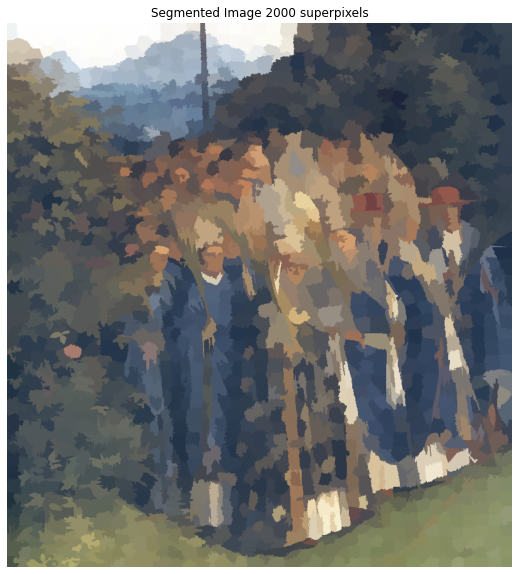

In [139]:
from skimage.segmentation import slic
from skimage.color import label2rgb

n_segments= 2000

segments = slic(image, n_segments = n_segments, start_label=1)
segmented_img = label2rgb(segments, image, kind='avg', bg_label=0)

plt.figure(figsize=(10,10))
plt.imshow(segmented_img)
plt.title(f'Segmented Image {n_segments} superpixels')
plt.axis('off')
plt.show()

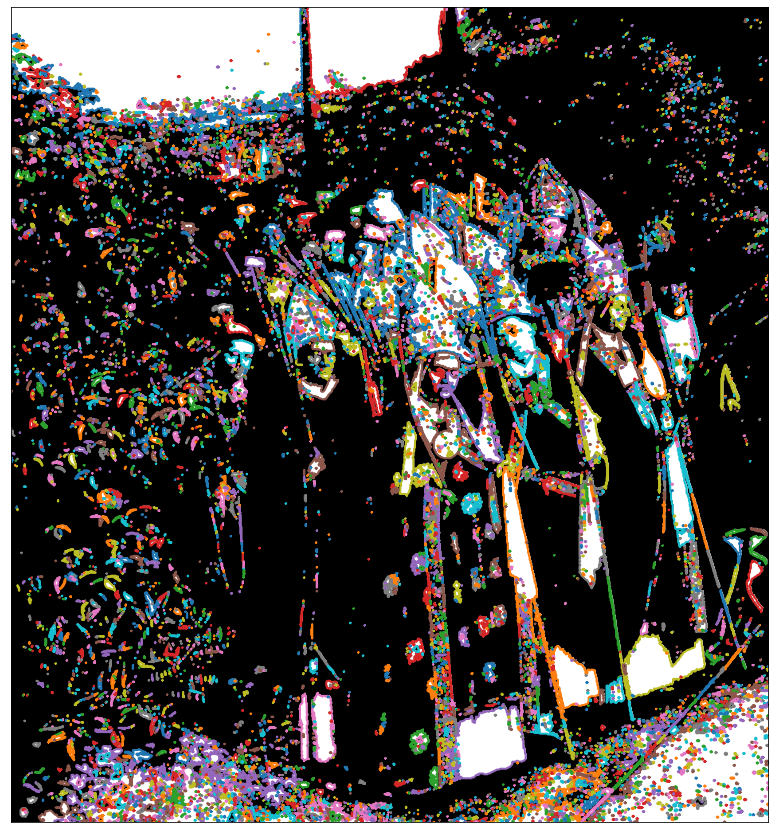

In [141]:
#find contours
#apply threshold or edge detection
from skimage import measure
from skimage.filters import threshold_otsu
from skimage import color

img = color.rgb2gray(image)
thresh = threshold_otsu(img)
threshold_image = img > thresh
contours = measure.find_contours(threshold_image, 0.8)


fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(threshold_image, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:,1], contour[:,0], linewidth=2)
    
ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()